In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [52]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Filter only the columns that we want

In [53]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly', 'Employment']]
df = df.rename({'ConvertedCompYearly' : 'Salary'}, axis=1)

## Filter out any null or NaN values in 'Salary' column

In [54]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Salary,Employment
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0,"Employed, full-time"
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0,"Employed, full-time"
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0,"Employed, full-time"
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0,"Employed, full-time;Independent contractor, fr..."
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0,"Employed, full-time"


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Salary        48019 non-null  float64
 4   Employment    48007 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


## Drop any null or nan values in rows

In [57]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
Employment      0
dtype: int64

## Filter 'Employment' column for only full-time employee's

In [58]:
f = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Salary        47813 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


## Filter out 'Country' with very little data in rows

In [59]:
df['Country'].value_counts()

Country
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64

## So 'Country' with 1 we will remove

### This is a function to loop through the 'Country' column and remove any that dont meet the data requirment

In [60]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

## Now we setup our mapping function to map through the shorten_categories function

In [61]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                11846
Other                                                    8307
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1206
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1009
Switzerland                                               659
Austria                                                   531


## Use matplotlib library to plot out our data to get a better visual

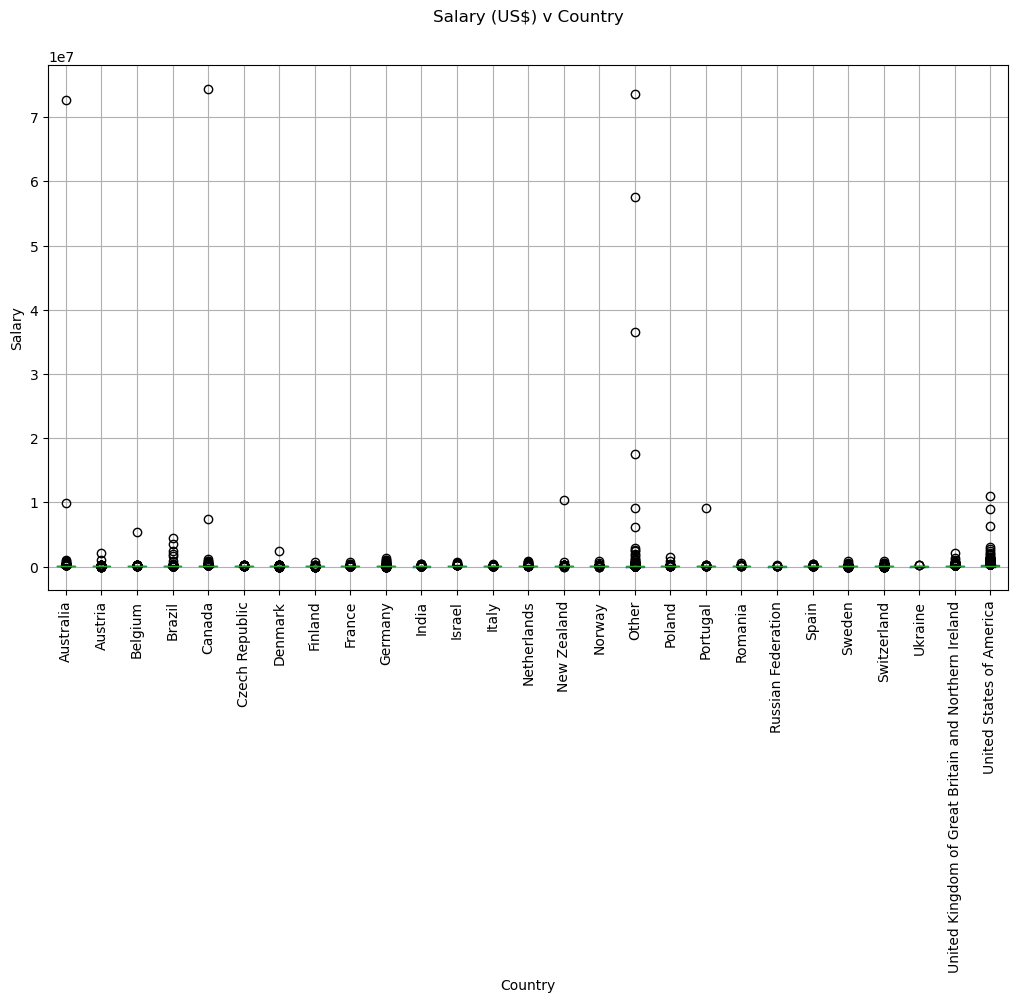

In [62]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

### This code filters a DataFrame named df based on certain conditions:

In [63]:
# df = df[df["Salary"] <= 250000]: This line retains only the rows where the "Salary" column value is less than or equal to 250,000.

# df = df[df["Salary"] >= 10000]: This line retains only the rows where the "Salary" column value is greater than or equal to 10,000.

# df = df[df['Country'] != 'Other']: This line retains only the rows where the "Country" column value is not equal to 'Other'.

### In simpler terms, these lines of code remove rows from the DataFrame where the salary is either too low (less than 10,000) or too high (greater than 250,000), and also removes rows where the country is labeled as 'Other'.

In [64]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

#### fig, ax = plt.subplots(1,1, figsize=(12, 7)): This line creates a figure (fig) and a set of subplots (ax) with a single subplot arranged in a grid of 1 row and 1 column. The figsize parameter sets the width and height of the figure to 12 and 7 inches, respectively.

#### df.boxplot('Salary', 'Country', ax=ax): This line creates a box plot where the "Salary" column values are plotted on the y-axis and the "Country" column values are plotted on the x-axis. The ax=ax parameter specifies that the plot should be drawn on the subplot ax created in the previous line.

#### plt.suptitle('Salary (US$) v Country'): This line adds a centered title above the entire figure (super title) indicating that the plot represents the distribution of salary across different countries.

#### plt.title(''): This line sets an empty title for the plot.

plt.ylabel('Salary'): This line sets the label for the y-axis to "Salary".

plt.xticks(rotation=90): This line rotates the x-axis labels by 90 degrees to prevent overlapping when plotting country names.

plt.show(): This line displays the plot.

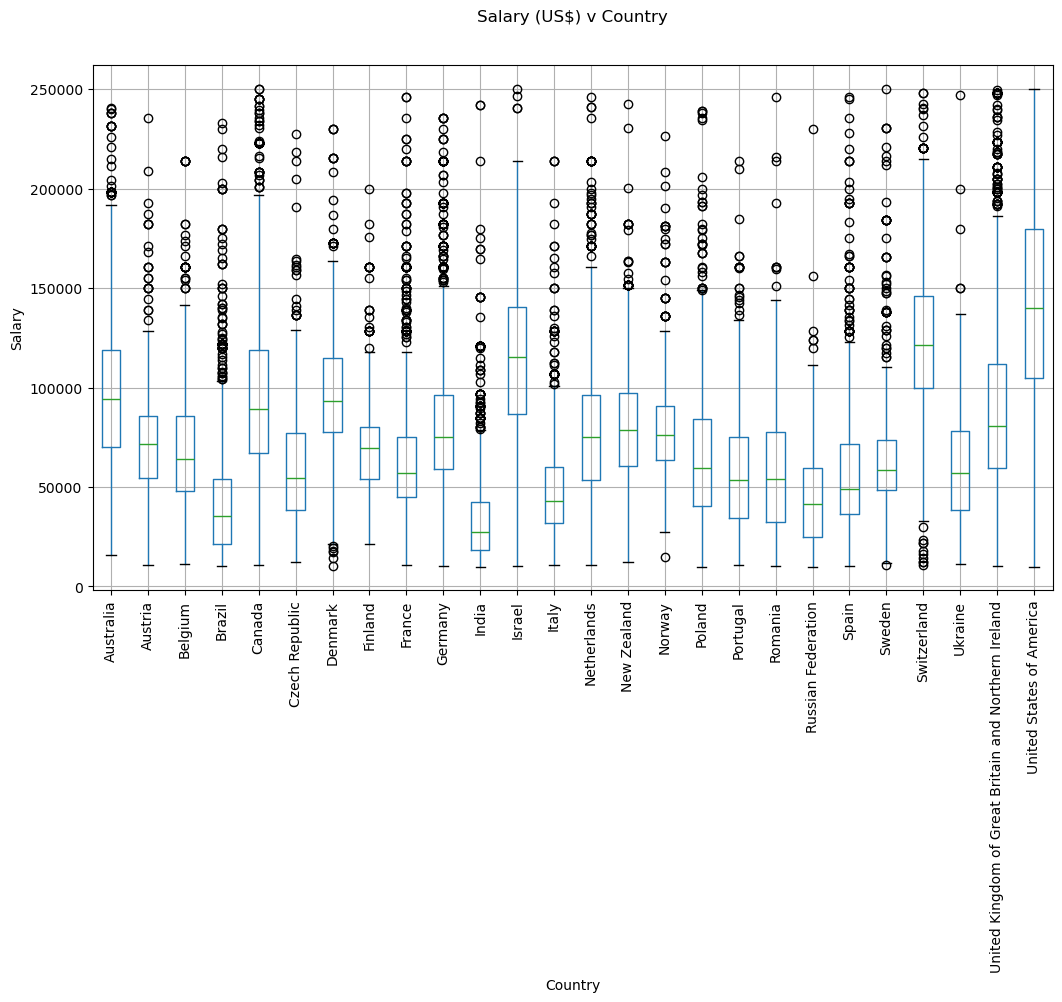

In [65]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

## Retrieve the unique values present in the "YearsCodePro" column of the DataFrame 

In [66]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '30', '24', '40', '4',
       '25', '12', '20', '11', '8', '18', '50', '27', '17', '43', '26',
       '38', '33', '29', '22', '1', '31', '34', '37', '42',
       'More than 50 years', '36', '39', '35', '41', '32', '44', '48',
       '45', '46', '47', '49'], dtype=object)

## This code defines a function clean_experience that takes a single argument x. It's designed to clean up the values in the "YearsCodePro" column of a DataFrame.

In [67]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

## This code show's us all the education lists

In [68]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

## This code defines a function clean_education that takes a single argument x. It's designed to clean up the values in the "Education" column of a DataFrame

In [69]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

## Code for taking the education that we want and they are assigned an integer

In [70]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

## Import scikit-learn for creating a machine learning model

#### from sklearn.preprocessing import LabelEncoder: This line imports the LabelEncoder class from the sklearn.preprocessing module. LabelEncoder is used to convert categorical labels into numeric values.

#### le_education = LabelEncoder(): This line creates an instance of the LabelEncoder class and assigns it to the variable le_education.

#### df['EdLevel'] = le_education.fit_transform(df['EdLevel']): This line applies the fit_transform method of the LabelEncoder object to the "EdLevel" column of the DataFrame df. This method fits the encoder to the unique values in the column and then transforms the values into numeric labels.

#### df["EdLevel"].unique(): This line prints out the unique numeric labels assigned to the "EdLevel" column after encoding.

#le.classes_: This line is a comment and not executed. It shows that you can access the original classes using le.classes_ after fitting the LabelEncoder, which gives you the mapping of numeric labels to original categorical values.

In [71]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 1, 2, 3])

#### Here's what each part does:

le_country = LabelEncoder(): This line creates an instance of the LabelEncoder class and assigns it to the variable le_country. LabelEncoder is used to convert categorical labels into numeric values.

df['Country'] = le_country.fit_transform(df['Country']): This line applies the fit_transform method of the LabelEncoder object to the "Country" column of the DataFrame df. This method fits the encoder to the unique values in the column and then transforms the values into numeric labels.

df["Country"].unique(): This line prints out the unique numeric labels assigned to the "Country" column after encoding. Each unique value in the original "Country" column is represented by a unique integer label generated by the LabelEncoder.

In [72]:
from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([25, 24,  7,  0, 13,  9, 21,  8, 20,  3, 17, 12,  4, 22, 10,  1, 15,
       19, 16,  2,  6, 11, 23,  5, 18, 14])

#### X = df.drop("Salary", axis=1): Here, we are creating a new DataFrame X by dropping the column labeled "Salary" from the original DataFrame df. The axis=1 parameter specifies that we want to drop a column (since axis=1 refers to columns), rather than a row. So, X will contain all the columns of df except for the "Salary" column.

y = df["Salary"]: This line extracts the "Salary" column from the original DataFrame df and assigns it to the variable y. So, y will contain only the values from the "Salary" column of df.

In summary, X will contain the features (or independent variables) used for prediction, while y will contain the target variable (or dependent variable) that we want to predict.

In [73]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = linear_reg.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.2510194368865597


In [77]:
error

46034.22705480432

In [78]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [79]:
y_pred = dec_tree_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.4843224672837866


In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,551.31


In [34]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [81]:
y_pred = random_forest_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.5837264171914327


In [82]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$34,319.03


In [83]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [84]:
regressor = gs.best_estimator_

regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))
print(r2_score(y_test, y_pred))

$34,676.85
0.5750007712869577


In [85]:
X

,Country,EdLevel,YearsCodePro
2,25,0,23.0
3,25,0,7.0
5,24,1,21.0
6,25,1,3.0
7,25,0,3.0
...,...,...,...
89156,25,0,8.0
89158,21,0,8.0
89162,3,2,24.0
89167,10,0,2.0


In [86]:
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [87]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[25.,  2., 15.]])

In [88]:
y_pred = regressor.predict(X_test)
y_pred
print(r2_score(y_test, y_pred))


0.5750007712869577


In [89]:
import pickle

In [90]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [91]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [92]:
y_pred = regressor_loaded.predict(X_test)
y_pred

array([83483.5       , 87414.        , 95812.87037037, ...,
       36338.80357143, 79477.69911504, 86080.5890411 ])